# Text preprocessing

Text preprocessing is an approach for cleaning and preparing text data for use in a specific context. Developers use it in almost all natural language processing (NLP) pipelines, including voice recognition software, search engine lookup, and machine learning model training. It is an essential step because text data can vary. 

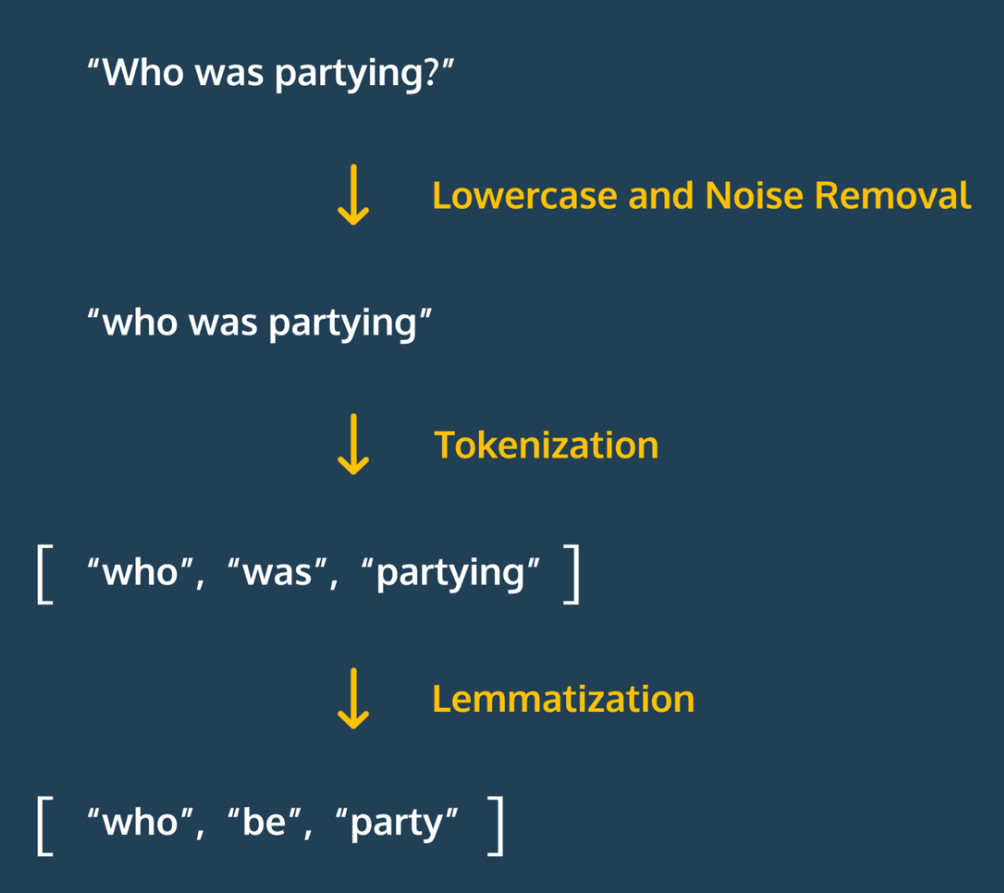

## Noise removal

In [28]:
import re 

text = "<p>    This is a paragraph</p>" 
print(text)

# .sub method includes three arguments: 
# 1 reg expression of text to look for
# 2 reg expression of replacement text
# 3 input string
result = re.sub(r'<.?p>', '', text)

print(result) 
#    This is a paragraph




<p>    This is a paragraph</p>
    This is a paragraph


## Tokenization

A method for breaking a text up to each work into smaller components. Can tokenise at work and sentence level

In [29]:
from nltk.tokenize import word_tokenize

text = "Tokenize this text"
tokenized = word_tokenize(text)

print(tokenized)
# ["Tokenize", "this", "text"]

from nltk.tokenize import sent_tokenize

text = "Tokenize this sentence. Also, tokenize this sentence."
tokenized = sent_tokenize(text)

print(tokenized)
# ['Tokenize this sentence.', 'Also, tokenize this sentence.']

['Tokenize', 'this', 'text']
['Tokenize this sentence.', 'Also, tokenize this sentence.']


## Normalization

A catch-all term for various text pre-processing tasks. In the next few exercises, we’ll cover a few of them:

- Upper or lowercasing
- Stopword removal
- Stemming – bluntly removing prefixes and suffixes from a word
- Lemmatization – replacing a single-word token with its root

In [30]:
my_string = 'tHiS HaS a MiX oF cAsEs'

print(my_string.upper())
# 'THIS HAS A MIX OF CASES'

print(my_string.lower())
# 'this has a mix of cases'

THIS HAS A MIX OF CASES
this has a mix of cases


### Stop words

In [31]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 

nbc_statement = "NBC was founded in 1926 making it the oldest major broadcast network in the USA"
  
word_tokens = word_tokenize(nbc_statement) 
# tokenize nbc_statement

statement_no_stop = [word for word in word_tokens if word not in stop_words]

print(statement_no_stop)

['NBC', 'founded', '1926', 'making', 'oldest', 'major', 'broadcast', 'network', 'USA']


### Stemming

stemming is the text preprocessing normalization task concerned with bluntly removing word affixes (prefixes and suffixes

More efficient than lemmatization as does not require the part of speech for each word  

Notice, the words like ‘was’ and ‘founded’ became ‘wa’ and ‘found’, respectively. The fact that these words have been reduced is useful for many language processing applications. However, you need to be careful when stemming strings, because words can often be converted to something unrecognizable.

In [32]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

tokenized = ['NBC', 'was', 'founded', 'in', '1926', '.', 'This', 'makes', 'NBC', 'the', 'oldest', 'major', 'broadcast', 'network', '.']

stemmed = [stemmer.stem(token) for token in tokenized]

print(stemmed)

['nbc', 'wa', 'found', 'in', '1926', '.', 'thi', 'make', 'nbc', 'the', 'oldest', 'major', 'broadcast', 'network', '.']


### Lemmatization

Lemmatization is a method for casting words to their root forms. This is a more involved process than stemming, because it requires the method to know the part of speech for each word. Since lemmatization requires the part of speech, it is a less efficient approach than stemming.

In [33]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized = ["NBC", "was", "founded", "in", "1926"]

lemmatized = [lemmatizer.lemmatize(token) for token in tokenized]

print(lemmatized)

['NBC', 'wa', 'founded', 'in', '1926']


The result saved to lemmatized contains 'wa', while the rest of the words remain the same. Not too useful. This happened because lemmatize() treats every word as a noun. To take advantage of the power of lemmatization, we need to tag each word in our text with the most likely part of speech. We’ll do that in the next exercise.

## Part-of-speech tagging

To improve the performance of lemmatization, we need to find the part of speech for each word in our string. 

Part-of-speech tagging is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech based on both its definition and its context.

In [34]:
# wordnet is a database that we use for contextualizing words
from nltk.corpus import wordnet

# Counter is a container that stores elements as dictionary keys
from collections import Counter

#  we use the wordnet.synsets() function to get a set of synonyms for the word:
def get_part_of_speech(word):
  probable_part_of_speech = wordnet.synsets(word)

  pos_counts = Counter()

  # Count number of synonyms that fall into each part of speech
  # Part of speech data comes from wordnet https://www.nltk.org/howto/wordnet.html
  # Classifies each part of speech as nvar = noun verb adjective adverb
  pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
  pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
  pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
  pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  
  most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
  return most_likely_part_of_speech

tokenized = ["How", "old", "is", "the", "country", "Indonesia"]

lemmatized = [lemmatizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]

print(lemmatized)



['How', 'old', 'be', 'the', 'country', 'Indonesia']


## Lemmatization advantages and disadvantages

Lemmatization offers the following benefits:

- Accuracy. Lemmatization is much more accurate than stemming, as it's able to more precisely determine the lemma of a word.
- Understanding text. Lemmatization is useful for tools in NLP like AI chatbots for understanding full sentence input from end users. This is also useful for returning specific search queries.
- Contextual understanding. Word-per-word, lemmatization can understand a term based on the contextual use of that word.

But lemmatization does have some drawbacks when compared to stemming. For example, lemmatization requires more computational overhead than stemming, which can be performed faster and with fewer computing resources. Lemmatization algorithms are also slower than stemming algorithms due to the morphological analysis lemmatization conducts on each inflected word.


## Examples

Stemming:

- Study → Studi
- Studying → Studi
- Studies → Studi
- Studied → Studi
- Studier → Studier

Lemmatization:
- Study → Study
- Studying → Study
- Studies → Study
- Studied → Study
- Studier → Study